# 3.8 Assignment 3: Logistic Regression and kNN
An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. The CSV file contains the various types of quality as measured by the tool. The following lists the type of qualities that the dataset contains:
Types of qualities	Description
 i. num_words	number of words in the post
ii. num_characters	number of characters in the post
iii. num_misspelled	number of misspelled words
iv. bin_end_qmark	if the post ends with a question mark
v. num_interrogative	number of interrogative words in the post
vi. bin_start_small	if the answer starts with a lowercase letter ("1" means yes, otherwise no)
vii. num_sentences	number of sentences per post
viii. num_punctuations	number of punctuation symbols in the post
ix. label: the label of the post	("G" for good and "B" for bad) as determined by the tool

INSTRUCTIONS
Create a logistics regression model to predict the class label from the first eight attributes of the question set.

Try doing the same using two different subsets (your choice) of those eight attributes.

Report the accuracies of each of these three models.

For the two subsets that you use, provide some justification (why you chose those features in a given subset).

As discussed, it is useful to report not just a single accuracy number for a given model, but either an average accuracy over many runs or a distribution of accuracies over those runs.

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [74]:
df_posts = pd.read_csv('Problem 1—quality.csv')
print(df_posts.columns)
display(df_posts)

Index(['S.No.', 'num_words', 'num_characters', 'num_misspelled',
       'bin_end_qmark', 'num_interrogative', 'bin_start_small',
       'num_sentences', 'num_punctuations', 'label'],
      dtype='object')


,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B
5,6,7,39,1,0,0,0,1,2,B
6,7,10,46,4,0,2,1,2,2,B
7,8,14,70,5,0,0,0,2,16,B
8,9,0,46,0,0,0,0,1,0,B
9,10,31,173,26,0,0,1,3,7,B


In [75]:
df_posts['label_scaled'] = df_posts['label'].map({'G': 1, 'B': 0})
display(df_posts)

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label,label_scaled
0,1,10,48,2,0,0,0,2,4,B,0
1,2,8,25,0,0,0,1,1,0,B,0
2,3,20,81,0,1,19,0,1,1,B,0
3,4,9,34,1,0,1,0,1,2,B,0
4,5,18,69,3,0,1,0,1,0,B,0
5,6,7,39,1,0,0,0,1,2,B,0
6,7,10,46,4,0,2,1,2,2,B,0
7,8,14,70,5,0,0,0,2,16,B,0
8,9,0,46,0,0,0,0,1,0,B,0
9,10,31,173,26,0,0,1,3,7,B,0


In [76]:
df_posts.describe()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label_scaled
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,257.500000,26.285714,120.500000,3.035714,0.142857,1.392857,0.142857,2.571429,5.392857,0.500000
std,254.620633,34.332640,162.859744,5.620611,0.356348,3.520725,0.356348,2.936722,9.897023,0.509175
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.750000,9.000000,43.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,257.500000,13.500000,62.500000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.500000
75%,507.250000,26.500000,119.500000,4.000000,0.000000,1.000000,0.000000,2.000000,6.250000,1.000000
max,514.000000,169.000000,831.000000,26.000000,1.000000,19.000000,1.000000,13.000000,48.000000,1.000000


## Problem 1 [5 points]

In [91]:
# Separate features (X) and target (y) First 8 features
X = df_posts[['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark',
        'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations']]
y = df_posts['label_scaled']

X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit(maxiter=50)
y_pred_prob = result.predict(X_test)  # Probabilities for each class

# Get the predicted class by choosing the class with the highest probability
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy_logit = accuracy_score(y_test, y_pred)

print(f"Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): {accuracy_logit:.2%}")
result.summary()

Optimization terminated successfully.
         Current function value: 0.259636
         Iterations 10
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 50.00%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           label_scaled   No. Observations:                   22
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.6232
Time:                        20:43:52   Log-Likelihood:                -5.7120
converged:                       True   LL-Null:                       -15.158
Covariance Type:            nonrobust   LLR p-value:                   0.01545
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6926      2.548     -1.449      0.147      -8.686       1.301
num_words             0.0069      0.314      0.022      0.982      -0.608       0.622
num_characters        0.0151      0.074      0.204      0.839      -0.130       0.161
num_misspelled       -1.3324      0.867     -1.538      0.124      -3.031       0.366
bin_end_qmark        -4.6775      3.652     -1.281      0.200     -11.835       2.480
num_interrogative    -0.1024      0.532     -0.193      0.847      -1.145       0.940
bin_start_small      -1.6011      2.747     -0.583      0.560      -6.984       3.782
num_sentences         5.5784      4.494      1.241      0.215      -3.231      14.387
num_punctuations     -1.1557      0.771     -1.499      0.134      -2.667       0.356
=====================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [42]:
# Going to do stepwise selection to see which model performs best
# Accuracy shown for all models
df_cols = list(df_posts.columns)[1:-2]
for i in range(len(df_cols)):
    X = df_posts[df_cols[:i+1]]
    print(f"Trying {df_cols[:i+1]}")
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = sm.Logit(y_train, X_train)
    result = model.fit(maxiter=200)
    print(result.summary())
    y_pred_prob = result.predict(X_test)  # Probabilities for each class

    # Get the predicted class by choosing the class with the highest probability
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Calculate accuracy
    accuracy_logit = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): {accuracy_logit:.2%}")
    print('')
    print('='*100)
    print('')

Trying ['num_words']
Optimization terminated successfully.
         Current function value: 0.494157
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           label_scaled   No. Observations:                   22
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2828
Time:                        19:44:10   Log-Likelihood:                -10.871
converged:                       True   LL-Null:                       -15.158
Covariance Type:            nonrobust   LLR p-value:                  0.003411
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8020      1.031     -1.748      0.080      -3.823       0.219
num_word

<b>Answer (both above and below)</b><p>
Picking two of the best models:<p>
1. `['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark']` Because it has the fewest features with a 100% accuracy, however, our data is very small and this model could be overfit.
2. `['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']` Because it also has 100% accuracy and might do better if there were more data.

In [92]:
# Use several different random states to see how the model performs
# Going to do stepwise selection to see which model performs best
# Accuracy shown for all models
cols_best = [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark',
        'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], 
             ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], 
             ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] 
results_model = []
for cols in cols_best:
    X = df_posts[cols]
    X = sm.add_constant(X)
    for random_state in range(1,28):
        print(f"Trying {cols_best} with random state {random_state}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        model = sm.Logit(y_train, X_train)
        try:
            result = model.fit(maxiter=100*random_state)
            y_pred_prob = result.predict(X_test)  # Probabilities for each class
            # Get the predicted class by choosing the class with the highest probability
            y_pred = (y_pred_prob >= 0.5).astype(int)
            # Calculate accuracy
            accuracy_logit = accuracy_score(y_test, y_pred)
            results_model.append([len(cols), random_state, accuracy_logit])
            print(f"Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): {accuracy_logit:.2%}")
            print('')
            print('='*100)
            print('')
        except Exception as e:
            print("Data split did not work")

Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 1
Optimization terminated successfully.
         Current function value: 0.313678
         Iterations 9
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 100.00%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 2
         Current function value: inf
         Iterations: 200
Data split did not work
Trying [['num_words', 'num_characters',

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log


         Current function value: inf
         Iterations: 1200
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 13
         Current function value: inf
         Iterations: 1300
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 14
         Current function value: inf
         Iterations: 1400
Data split did not work
Trying [['num_words', 'num_characters',

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 1800
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 19
         Current function value: inf
         Iterations: 1900
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 20
         Current function value: inf
         Iterations: 2000
Data split did not work
Trying [['num_words', 'num_characters',

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
S:\code\uw\I

         Current function value: inf
         Iterations: 2200
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 23
Optimization terminated successfully.
         Current function value: 0.217950
         Iterations 11
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 66.67%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 24
Optimization terminated successfully

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 66.67%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 22
         Current function value: 0.382318
         Iterations: 2200
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 66.67%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 23
Optimization terminated successfully.
         Current function value: 0.400109
    

         Current function value: 0.259504
         Iterations: 900
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 50.00%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 10
Optimization terminated successfully.
         Current function value: 0.400214
         Iterations 9
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 83.33%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.276775
         Iterations: 1800
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 33.33%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 19
         Current function value: 0.277456
         Iterations: 1900
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 66.67%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 20


S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 2000
Data split did not work
Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 21
Optimization terminated successfully.
         Current function value: 0.299206
         Iterations 38
Accuracy of Logit Model predicting Post Quality (Good=1, Bad=0): 50.00%


Trying [['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark'], ['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small']] with random state 22
Optimization terminated successfully

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


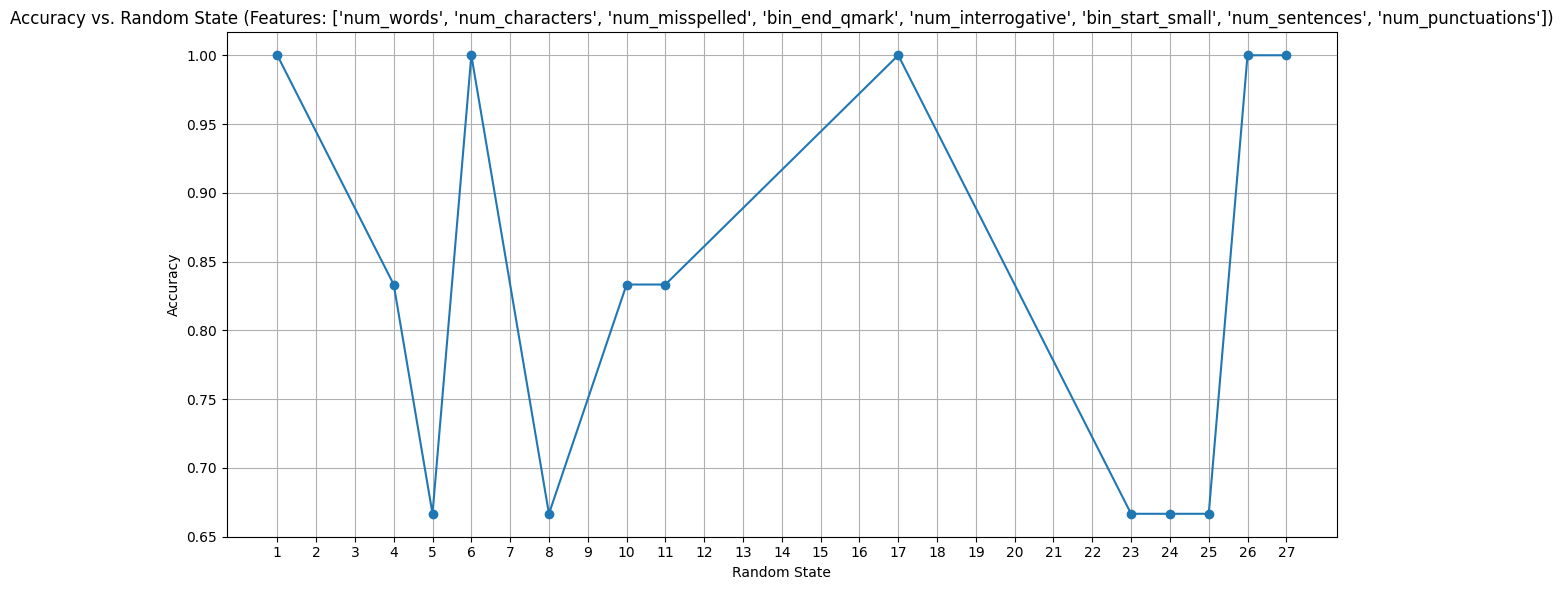

Average accuracy with 8 features: 83.33%


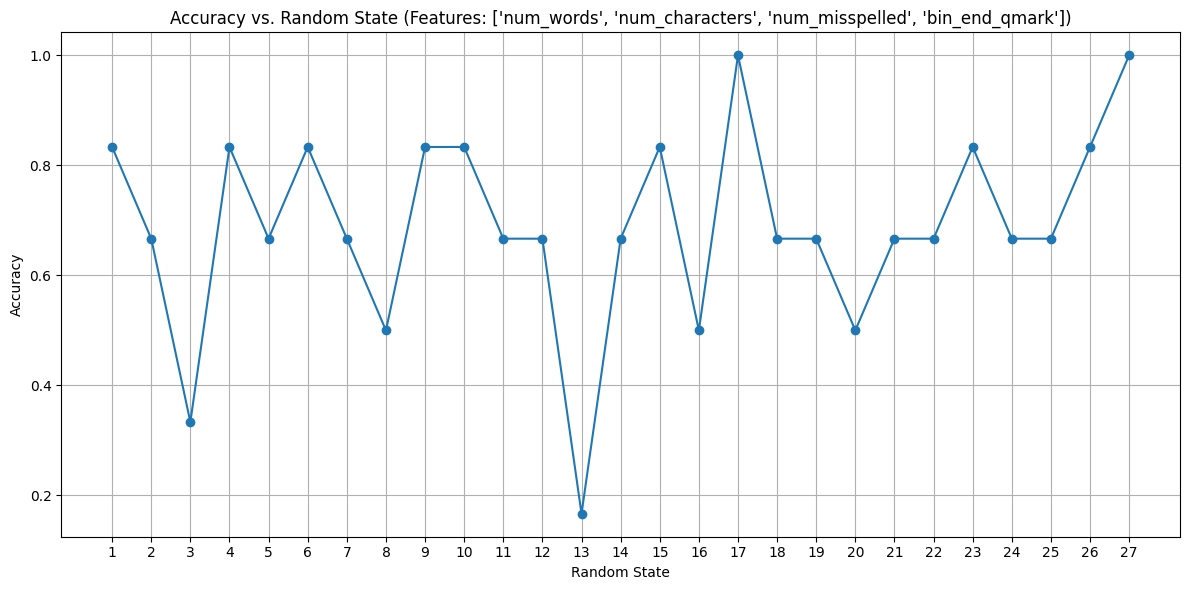

Average accuracy with 4 features: 69.14%


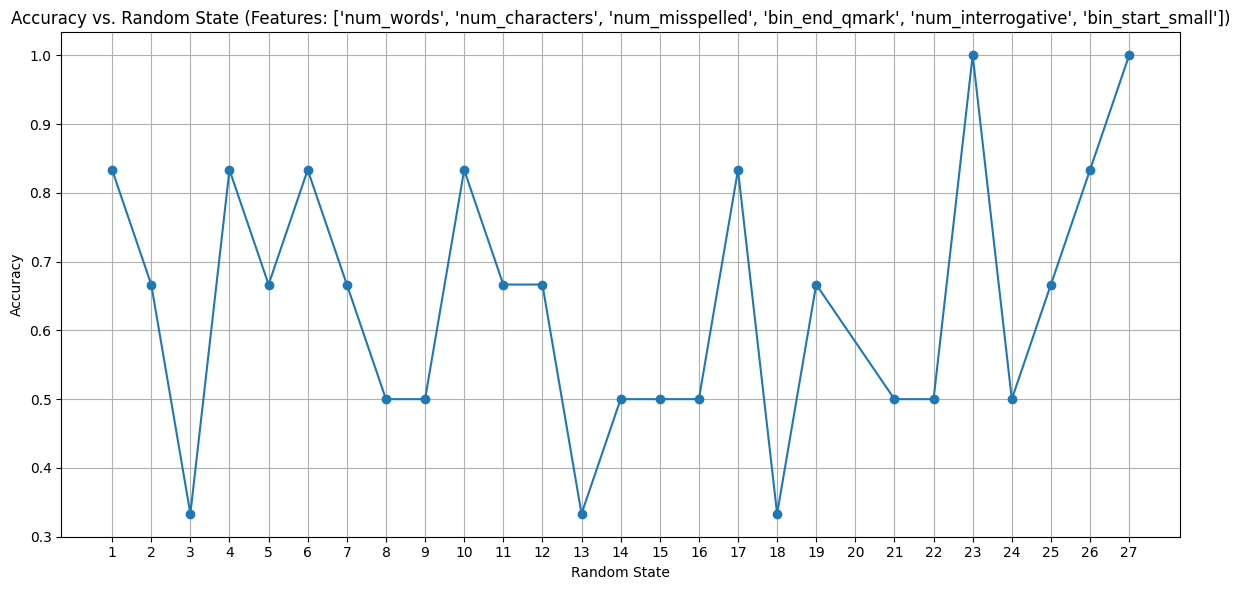

Average accuracy with 6 features: 64.10%


In [98]:
import matplotlib.pyplot as plt
df_results = pd.DataFrame(results_model, columns=['num_features', 'random_state', 'accuracy'])
num_features_list = list(set([x[0] for x in results_model]))
for i, num_features in enumerate(num_features_list):
    plt.figure(figsize=(12, 6))
    df_result = df_results[(df_results['num_features']==num_features)]
    plt.plot(df_result['random_state'], df_result['accuracy'], marker='o')
    plt.title(f'Accuracy vs. Random State (Features: {cols_best[i]})')
    plt.xlabel('Random State')
    plt.ylabel('Accuracy')
    plt.xticks(range(1,28))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    avg_accuracy = sum(df_result['accuracy'])/len(df_result['accuracy'])
    print(f"Average accuracy with {num_features} features: {avg_accuracy:.2%}")

<b>Answer</b><p>
Looking at the average across many different samples of data (test/train), the model with the features:<p>
    `['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark']`<p>
Has the best score, so I would use that model.

## Problem 2 [5 points]
Using a “wine” dataset, containing information about several wines, their characteristics, and their quality, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality. Report these features.

INSTRUCTIONS<p>
Download the wine dataset. Download wine dataset. It contains information about several wines—their characteristics (features) and if it's considered high quality or not (1 or 0).

First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2–10.

Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis. 

In [77]:
df_wine = pd.read_csv('Problem 2—wine dataset.csv')
print(df_wine.columns)
display(df_wine)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'is_red',
       'high_quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0.0,1.0


In [78]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Separate features to be scaled and target/non-scaled columns
features_to_scale = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]
non_scaled_cols = ['quality', 'is_red', 'high_quality']  # Assuming these are the columns not to scale.  Adjust as needed.

# Create separate DataFrames for features to be scaled and non-scaled columns
df_to_scale = df_wine[features_to_scale].copy()  # Create a copy to avoid modifying the original DataFrame directly
df_non_scaled = df_wine[non_scaled_cols].copy() # Create a copy

# 2. Choose a scaling method
#    You can switch between StandardScaler and MinMaxScaler here
scaler = StandardScaler()  # Or scaler = MinMaxScaler()

# 3. Fit and transform the features to be scaled
#    - 'fit' calculates the scaling parameters (mean, std, min, max) from the training data.
#    - 'transform' applies the scaling to the data.
scaled_features = scaler.fit_transform(df_to_scale)

# 4. Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

# 5. Concatenate the scaled features with the non-scaled columns
#    Make sure the index is aligned if necessary
df_scaled = pd.concat([df_scaled, df_non_scaled.reset_index(drop=True)], axis=1)

# Now, 'df_scaled' contains your data with the selected features scaled

# Print the first few rows of the scaled DataFrame to verify
df_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6497.000000,6497.000000
mean,-4.899540e-16,2.099803e-16,-1.968565e-16,3.499672e-17,5.249508e-17,-8.749179e-17,-6.999344e-17,-5.371996e-15,2.729744e-15,3.499672e-17,9.711589e-16,5.818378,0.246114,0.196552
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.873255,0.430779,0.397421
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,3.000000,0.000000,0.000000
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,5.000000,0.000000,0.000000
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,6.000000,0.000000,0.000000
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,6.000000,0.000000,0.000000
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,9.000000,1.000000,1.000000


In [82]:
# Going to do stepwise selection to see which model performs best
# Accuracy shown for all models
cols = list(df_scaled.columns)
results_wine = []
y = df_scaled['high_quality']
for i in range(1, len(cols)-1):
    X = df_scaled[cols[:i]]
    print(list(X.columns))
    X = sm.add_constant(X)
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
        model = sm.Logit(y_train, X_train)
        result = model.fit(maxiter=100*random_state)
        y_pred_prob = result.predict(X_test)  # Probabilities for each class
        # Get the predicted class by choosing the class with the highest probability
        y_pred = (y_pred_prob >= 0.5).astype(int)
        # Calculate accuracy
        accuracy_logit = accuracy_score(y_test, y_pred)
        results_wine.append([i, accuracy_logit])
    except Exception as e:
        pass

['fixed_acidity']
Optimization terminated successfully.
         Current function value: 0.492609
         Iterations 6
['fixed_acidity', 'volatile_acidity']
Optimization terminated successfully.
         Current function value: 0.480514
         Iterations 6
['fixed_acidity', 'volatile_acidity', 'citric_acid']
Optimization terminated successfully.
         Current function value: 0.480513
         Iterations 6
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar']
Optimization terminated successfully.
         Current function value: 0.476494
         Iterations 6
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides']
Optimization terminated successfully.
         Current function value: 0.463388
         Iterations 7
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide']
Optimization terminated successfully.
         Current function value: 0.463293
         Iterations 7
['fixed_acidity',

S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 2700


S:\code\uw\IMT574\py39_venv\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [99]:
print("Accuracy with stepwise selection for Wine Features")
for i, accuracy_logit in results_wine:
    print(f'{i} {accuracy_logit:.2%}')

Accuracy with stepwise selection for Wine Features
1 79.85%
2 79.85%
3 79.85%
4 79.85%
5 79.85%
6 79.85%
7 79.54%
8 80.08%
9 81.69%
10 82.38%
11 82.38%


In [84]:
best_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df_scaled[best_cols]
y = df_scaled['high_quality']
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
accuracies = []
for k in range(2,10):
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
    # Train the model
    knn.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy_knn)
    print(f"Accuracy of KNN {k=} Model predicting Program: {accuracy_knn:.2%}")

Accuracy of KNN k=2 Model predicting Program: 84.41%
Accuracy of KNN k=3 Model predicting Program: 82.97%
Accuracy of KNN k=4 Model predicting Program: 85.03%
Accuracy of KNN k=5 Model predicting Program: 84.41%
Accuracy of KNN k=6 Model predicting Program: 84.31%
Accuracy of KNN k=7 Model predicting Program: 83.59%
Accuracy of KNN k=8 Model predicting Program: 83.28%
Accuracy of KNN k=9 Model predicting Program: 83.33%


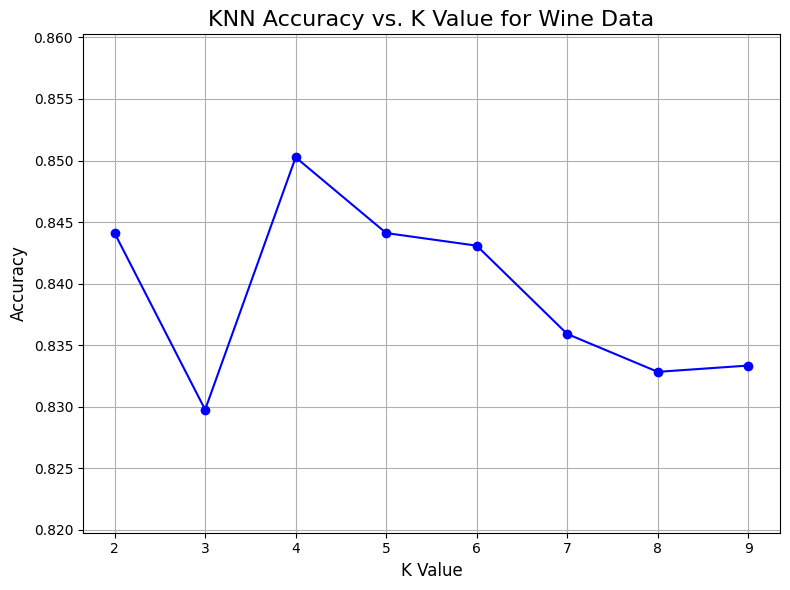

In [106]:
# Data from your provided accuracies
k_values = range(2,10)

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')  # 'o' for circle markers, '-' for line
plt.title('KNN Accuracy vs. K Value for Wine Data', fontsize=16)  # Add a title, increase font size
plt.xlabel('K Value', fontsize=12)  # Label the x-axis
plt.ylabel('Accuracy', fontsize=12)  # Label the y-axis
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid(True)  # Add a grid for easier reading
plt.ylim(min(accuracies)-.01, max(accuracies)+.01) #set the y axis limit
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot